# ETL, EDA, and Statistical Modeling of Abalone Data


## Abalone Data



```
Description of fields in abalone data.

Name            Data Type    Meas.    Description
----            ---------    -----    -----------
Sex             nominal               M, F, and I (infant)
Length          continuous    mm      Longest shell measurement
Diameter        continuous    mm      perpendicular to length
Height          continuous    mm      with meat in shell
Whole weight    continuous    grams   whole abalone
Shucked weight  continuous    grams   weight of meat
Viscera weight  continuous    grams   gut weight (after bleeding)
Shell weight    continuous    grams   after being dried
Rings           integer               +1.5 gives the age in years
```

The target variable is Rings because it is a predictor of age. You can take this as your problem, "How do we estimate the age of an abalone from the available data?"

At a high level you have:

1. Question/Problem
2. ETL
3. EDA
4. Statistical and Mathematical Modeling.

Of necessity, there is very little ETL here except to verify that the data has loaded correctly and with the correct types. For the EDA and Modeling parts, follow the guidelines in *Fundamentals*. Do not use regression as it had not been covered yet; you may only use single value models (mean) or mathematical distributions.

**Begin**

## 1.1 Statement of the Problem

Discuss your approach to estimating the age of the abalone from the available data.

**Our approach in estimating the age of the abalone from the available data is as follows:**

 - ETL (Extract, Transform, and Load) the data
 - Perform single variable EDA to understand the distribution of each of the variables along the dataset. This step gives us a larger understanding into the dataset and its variables.
 - Perform pairwise EDA to test the correlation between our different features and our target (Rings in this case) 
 - Find the feature with the highest correlation
 - Mathematically model the distribution of our target variable (Rings) along the dataset
 

## 1.2 (ETL) Extract, Transform, Load the Data

In [1]:
% matplotlib inline

UsageError: Line magic function `%` not found.


In [7]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

In [8]:
# You can load the dataset directly from a URL in Pandas
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/abalone.original.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


As shown on the dataframe above, the columns are not labeled

In [9]:
df.columns=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


After sucesfully naming our columns, we can proceed to the EDA

## 1.3 (EDA) Exploratory Data Analysis

The dataset provided is of abalone data.

We'll start off by reading and understanding the dataset, looking into the different features and variables it consists of:

In [10]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,104.798420,81.576251,27.903280,165.748432,71.873498,36.118722,47.766172,9.933684
std,24.018583,19.847973,8.365411,98.077804,44.392590,21.922850,27.840534,3.224169
min,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000,1.000000
25%,90.000000,70.000000,23.000000,88.300000,37.200000,18.700000,26.000000,8.000000
50%,109.000000,85.000000,28.000000,159.900000,67.200000,34.200000,46.800000,9.000000
75%,123.000000,96.000000,33.000000,230.600000,100.400000,50.600000,65.800000,11.000000
max,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000,29.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null int64
Diameter          4177 non-null int64
Height            4177 non-null int64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 293.8+ KB


As shown in the table above, there are a total of 4,177 rows. The features do not have any null values, nor do they have any illogical values.

## Abalone - Single Variables

We start with the single variable EDA of all the features provided in the data.

### Height

`Height` is the height of the abalone with the meat in shell in mm. 

We'll start off by understanding the distribution of Heights within the dataset:

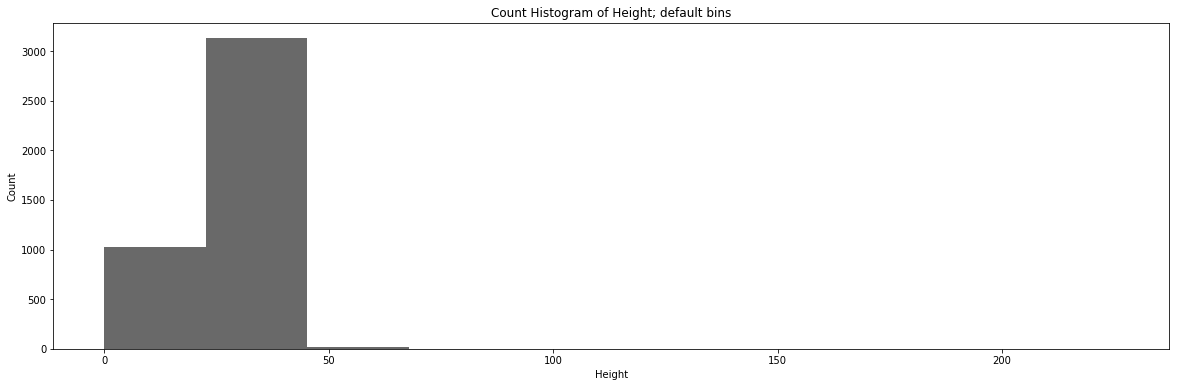

In [12]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df[ "Height"], color="DimGray")
axes.set_xlabel( "Height")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Height; default bins")

plt.show()
plt.close()

Based on the histogram above, it seems that there are a few extreme outliers which may effect our data analysis. We'll define the box plot function and then plot a box plot of height in order to further localize the outliers:

In [13]:
def restyle_boxplot(patch):
    # change color and linewidth of the whiskers
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    # change color and linewidth of the caps
    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    # change color and linewidth of the medians
    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    # change the style of fliers and their fill
    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)

    for box in patch["boxes"]:
        box.set(facecolor='#FFFFFF', alpha=0.5)


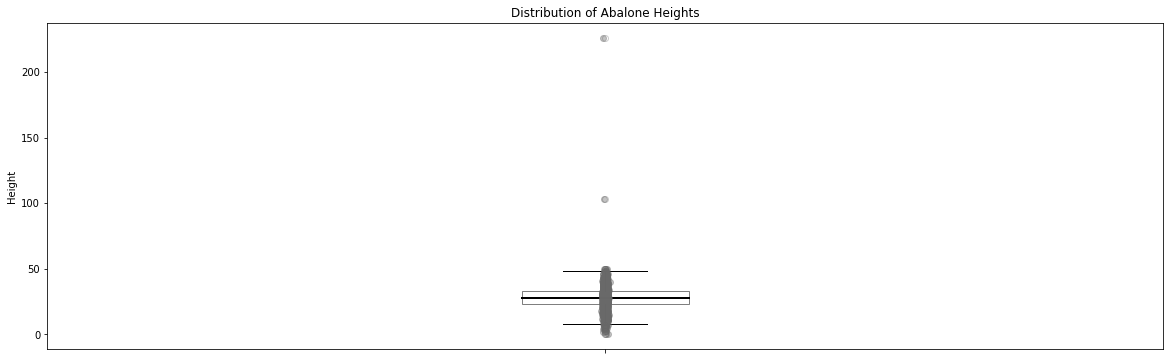

In [14]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(df[ "Height"], labels=[''], showfliers=True, patch_artist=True, zorder=1)
restyle_boxplot( patch)
axes.set_title("Distribution of Abalone Heights")
axes.set_ylabel("Height")
x = np.random.normal(1, 0.001, size=len(df["Height"]))
axes.plot(x, df["Height"], 'o', alpha=0.4, color="DimGray", zorder=2)

plt.show()
plt.close()

It seems anything after around 50 mm height is considred an outlier:

In [15]:
df_1=df[df['Height']<75]
df_1=df_1.reset_index(drop=True)

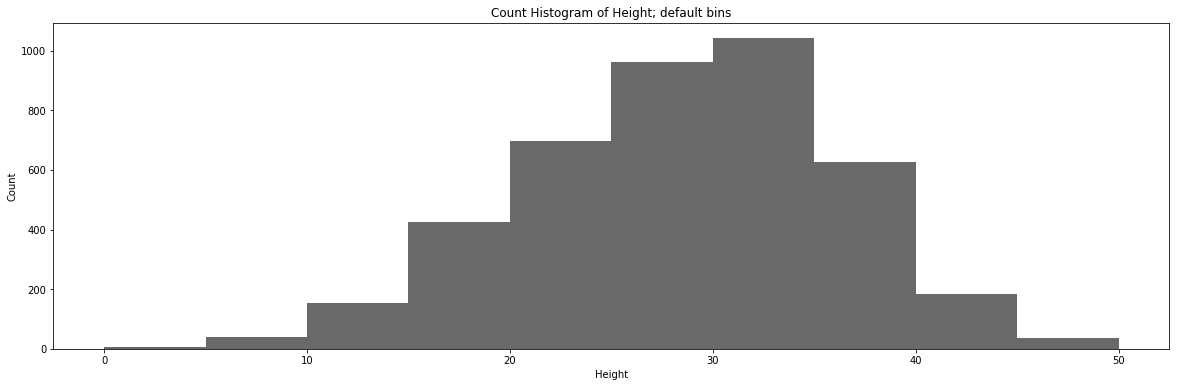

In [16]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df_1[ "Height"], color="DimGray")
axes.set_xlabel( "Height")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Height; default bins")

plt.show()
plt.close()

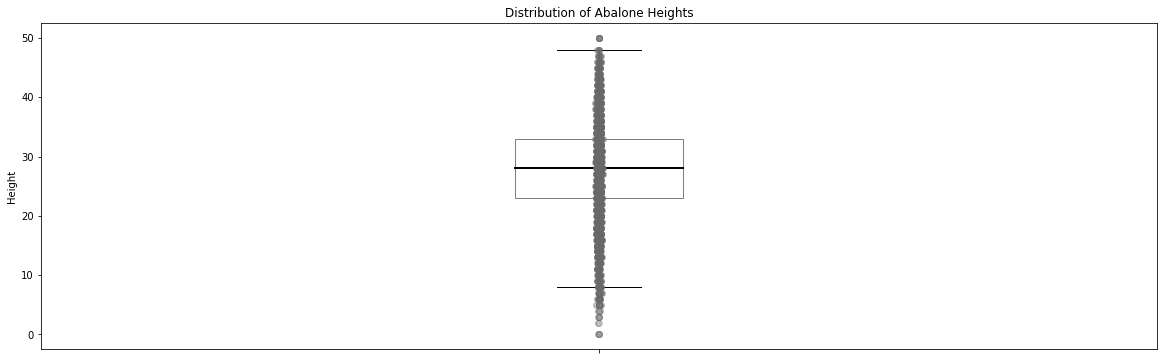

In [17]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(df_1[ "Height"], labels=[''], showfliers=True, patch_artist=True, zorder=1)
restyle_boxplot( patch)
axes.set_title("Distribution of Abalone Heights")
axes.set_ylabel("Height")
x = np.random.normal(1, 0.001, size=len(df_1["Height"]))
axes.plot(x, df_1["Height"], 'o', alpha=0.4, color="DimGray", zorder=2)

plt.show()
plt.close()

As shown on the charts above, after removing the outliers we can localize the bulk of our data to be between 0 and around 50 mm.

### Sex

`Sex` is the sex of the abalone. 

The distribution of sexes within the dataset is as follows:

In [18]:
pd.DataFrame(df_1["Sex"].value_counts().sort_index())

,Sex
F,1306
I,1342
M,1527


The abalone `Sex` feature could take a value of M (Male) ,F (Female), or I (Infant). 

They are more or less equally distributed with Males having a slightly higher quantity of data.

### Length

`Length` is the longest shell measure of the abalone in mm. 

The distribution of Lengths within the dataset is as follows:

In [19]:
pd.DataFrame(df_1["Length"].value_counts().sort_index())

,Length
15,1
22,1
26,2
27,1
28,2
...,...
154,3
155,2
156,2
160,1


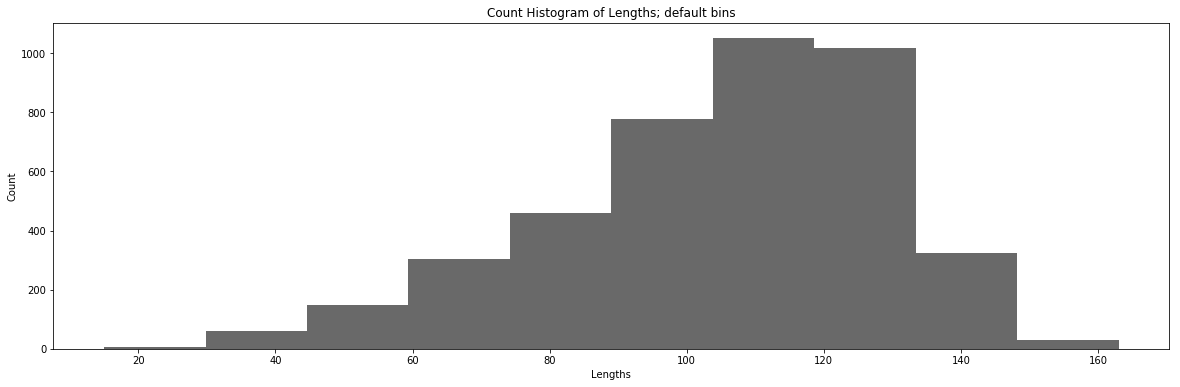

In [20]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df_1[ "Length"], color="DimGray")
axes.set_xlabel( "Lengths")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Lengths; default bins")

plt.show()
plt.close()

### Diameter

`Diameter` is the diameter of the dimension of the longest shell measure of the abalone in mm (perpendicular to length). 

The distribution of Diameters within the dataset is as follows:

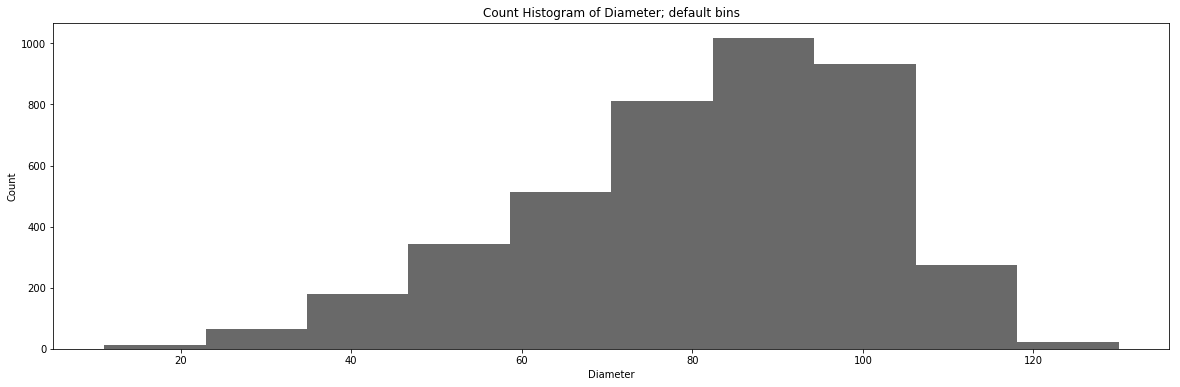

In [21]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df_1[ "Diameter"], color="DimGray")
axes.set_xlabel( "Diameter")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Diameter; default bins")

plt.show()
plt.close()

### Whole weight

`Whole weight` is the weight of the whole abalone in grams. 

The distribution of Whole weights within the dataset is as follows:

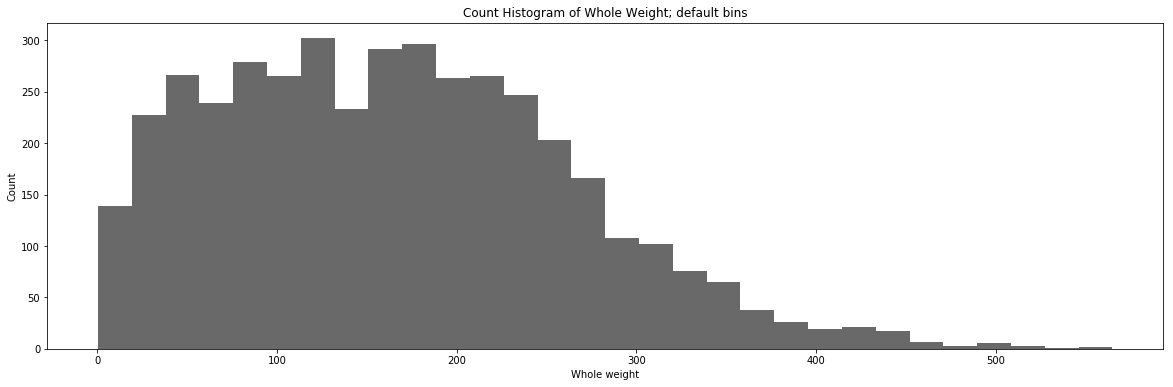

In [22]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df_1[ "Whole weight"], color="DimGray",bins=30)
axes.set_xlabel( "Whole weight")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Whole Weight; default bins")

plt.show()
plt.close()

It seems that we have a few outliers, a box plot will show them more clearly:

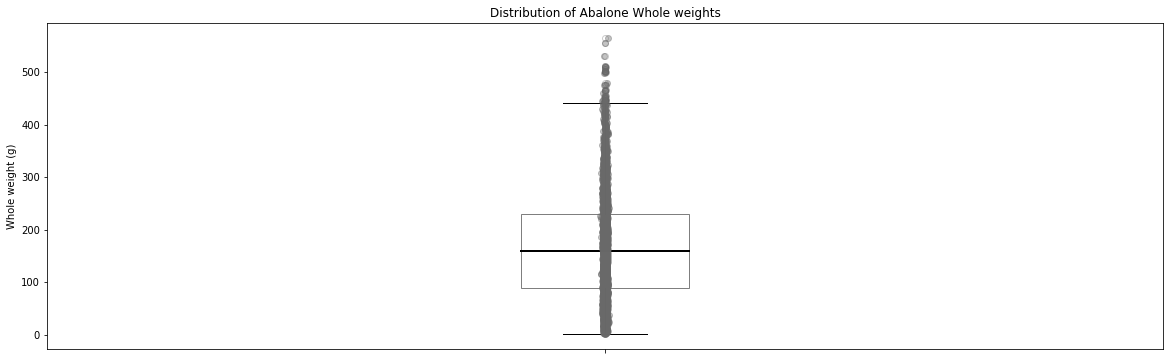

In [23]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(df_1[ "Whole weight"], labels=[''], showfliers=True, patch_artist=True, zorder=1)
restyle_boxplot( patch)
axes.set_title("Distribution of Abalone Whole weights")
axes.set_ylabel("Whole weight (g)")
x = np.random.normal(1, 0.001, size=len(df_1["Whole weight"]))
axes.plot(x, df_1["Whole weight"], 'o', alpha=0.4, color="DimGray", zorder=2)

plt.show()
plt.close()

As shown on the box plot, the outliers are the Whole weight values above 450 grams:

In [24]:
df_1=df_1[df_1['Whole weight']<=450].reset_index(drop=True)

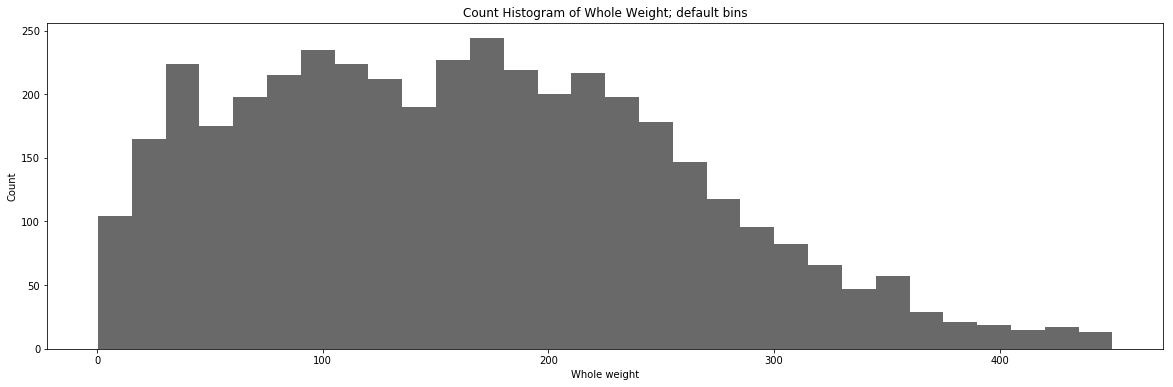

In [25]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df_1[ "Whole weight"], color="DimGray",bins=30)
axes.set_xlabel( "Whole weight")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Whole Weight; default bins")

plt.show()
plt.close()

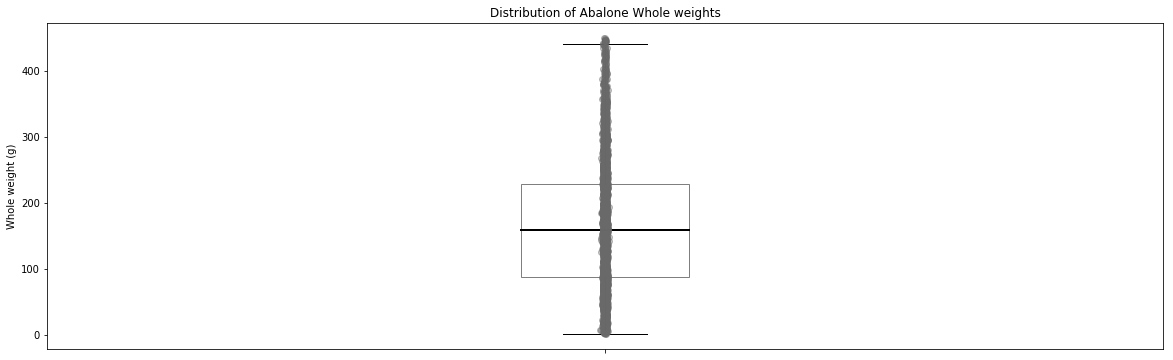

In [26]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(df_1[ "Whole weight"], labels=[''], showfliers=True, patch_artist=True, zorder=1)
restyle_boxplot( patch)
axes.set_title("Distribution of Abalone Whole weights")
axes.set_ylabel("Whole weight (g)")
x = np.random.normal(1, 0.001, size=len(df_1["Whole weight"]))
axes.plot(x, df_1["Whole weight"], 'o', alpha=0.4, color="DimGray", zorder=2)

plt.show()
plt.close()

As shown on the charts above, after removing the outliers we can localize the bulk of our data to be between 0 and around 450 g.

### Shucked weight

`Shucked weight` is the weight of the abalone meat in grams. 

The distribution of Shucked weights within the dataset is as follows:

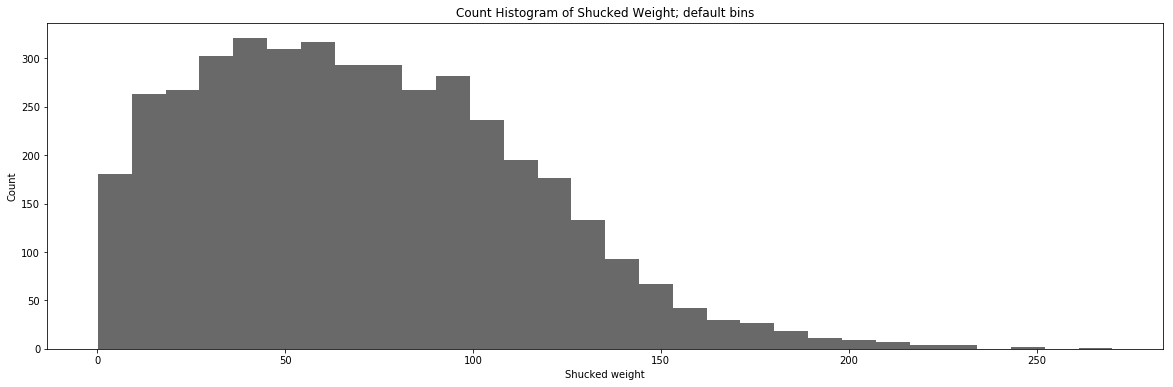

In [27]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df_1[ "Shucked weight"], color="DimGray",bins=30)
axes.set_xlabel( "Shucked weight")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Shucked Weight; default bins")

plt.show()
plt.close()

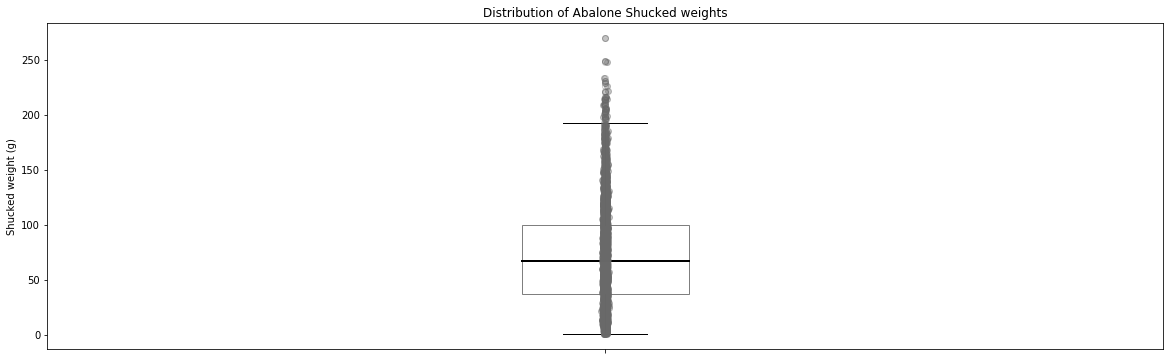

In [28]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(df_1[ "Shucked weight"], labels=[''], showfliers=True, patch_artist=True, zorder=1)
restyle_boxplot( patch)
axes.set_title("Distribution of Abalone Shucked weights")
axes.set_ylabel("Shucked weight (g)")
x = np.random.normal(1, 0.001, size=len(df_1["Shucked weight"]))
axes.plot(x, df_1["Shucked weight"], 'o', alpha=0.4, color="DimGray", zorder=2)

plt.show()
plt.close()

As shown on the charts above, we have outliers at Shucked weight values of over 230 grams.

In [29]:
df_1=df_1[df_1['Shucked weight']<=230].reset_index(drop=True)

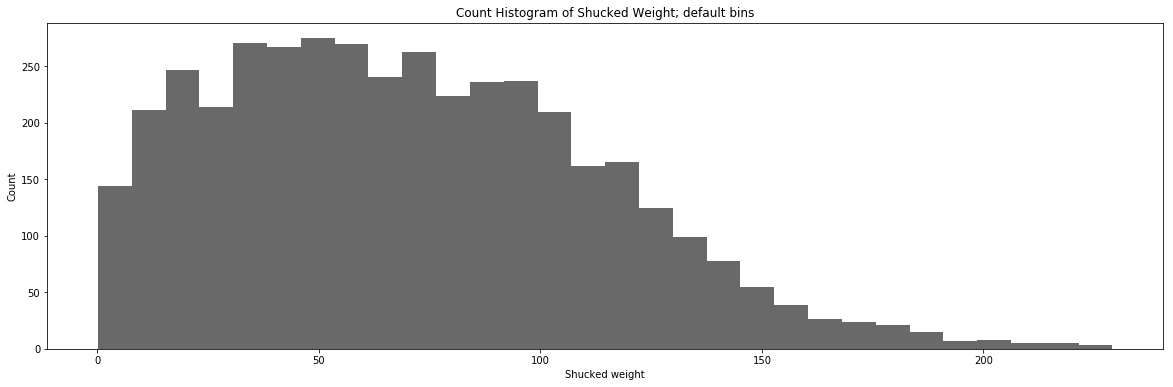

In [30]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df_1[ "Shucked weight"], color="DimGray",bins=30)
axes.set_xlabel( "Shucked weight")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Shucked Weight; default bins")

plt.show()
plt.close()

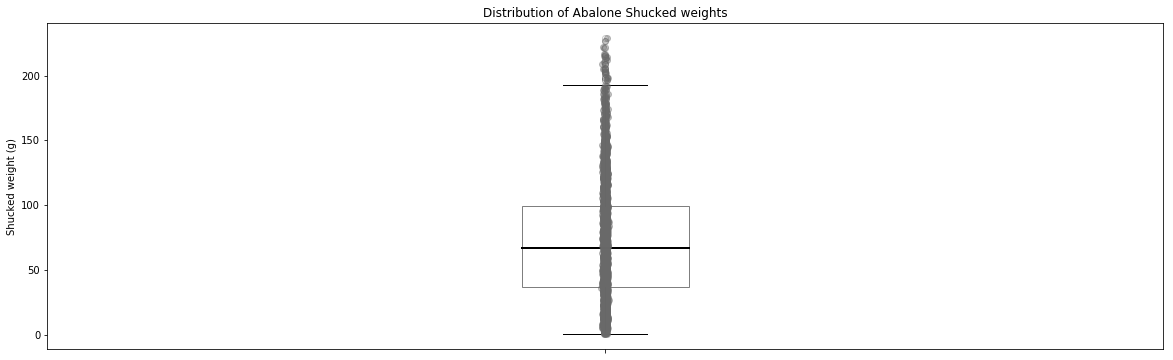

In [31]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(df_1[ "Shucked weight"], labels=[''], showfliers=True, patch_artist=True, zorder=1)
restyle_boxplot( patch)
axes.set_title("Distribution of Abalone Shucked weights")
axes.set_ylabel("Shucked weight (g)")
x = np.random.normal(1, 0.001, size=len(df_1["Shucked weight"]))
axes.plot(x, df_1["Shucked weight"], 'o', alpha=0.4, color="DimGray", zorder=2)

plt.show()
plt.close()

As shown on the charts above, after removing the outliers we can localize the bulk of our data to be between 0 and around 230 g.

### Viscera weight

`Viscera weight` is the gut weight of the abalone after bleeding in grams. 

The distribution of Viscera weights within the dataset is as follows:

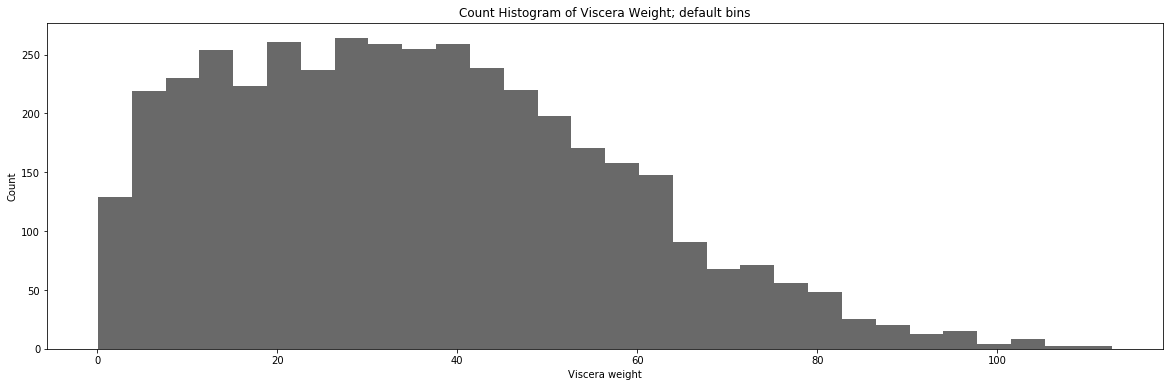

In [32]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df_1[ "Viscera weight"], color="DimGray",bins=30)
axes.set_xlabel( "Viscera weight")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Viscera Weight; default bins")

plt.show()
plt.close()

### Shell weight

`Shell weight` is the weight of the abalone after being dryed in grams. 

The distribution of Shell weights within the dataset is as follows:

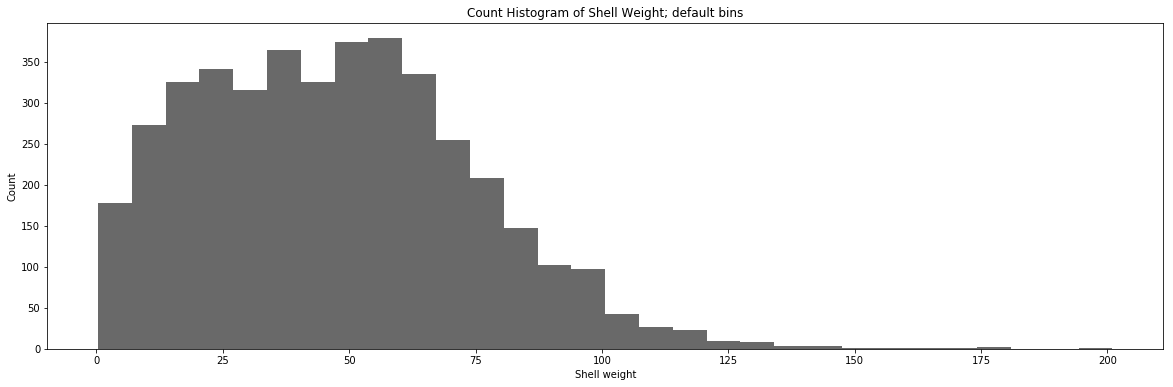

In [33]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df_1[ "Shell weight"], color="DimGray",bins=30)
axes.set_xlabel( "Shell weight")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Shell Weight; default bins")

plt.show()
plt.close()

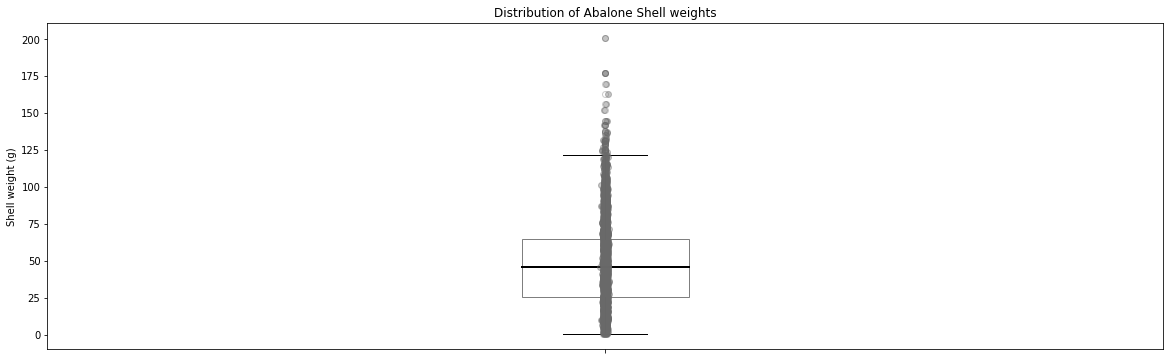

In [34]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(df_1[ "Shell weight"], labels=[''], showfliers=True, patch_artist=True, zorder=1)
restyle_boxplot( patch)
axes.set_title("Distribution of Abalone Shell weights")
axes.set_ylabel("Shell weight (g)")
x = np.random.normal(1, 0.001, size=len(df_1["Shell weight"]))
axes.plot(x, df_1["Shell weight"], 'o', alpha=0.4, color="DimGray", zorder=2)

plt.show()
plt.close()

Outliers exist after around 150 g

In [35]:
df_1=df_1[df_1['Shell weight']<=150].reset_index(drop=True)

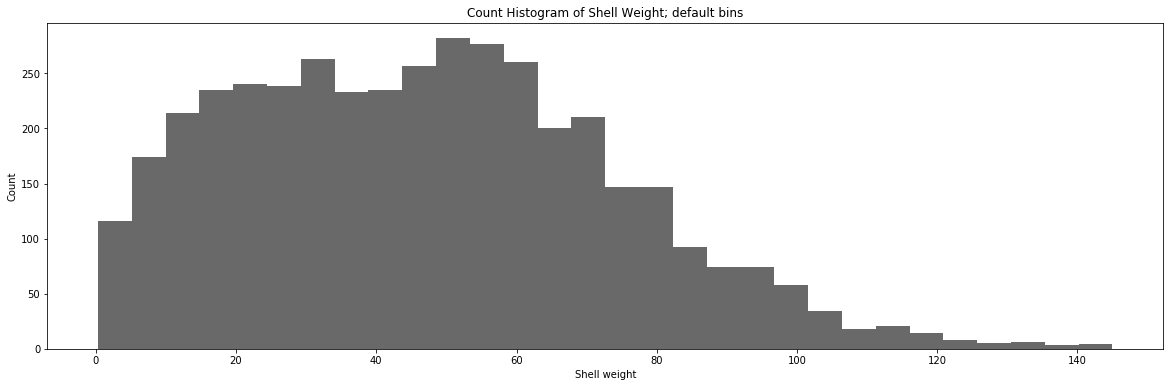

In [36]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df_1[ "Shell weight"], color="DimGray",bins=30)
axes.set_xlabel( "Shell weight")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Shell Weight; default bins")

plt.show()
plt.close()

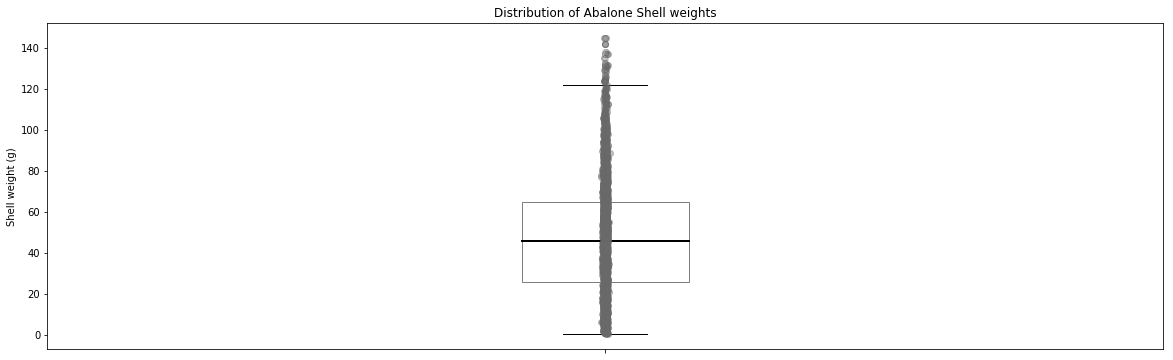

In [37]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
patch = axes.boxplot(df_1[ "Shell weight"], labels=[''], showfliers=True, patch_artist=True, zorder=1)
restyle_boxplot( patch)
axes.set_title("Distribution of Abalone Shell weights")
axes.set_ylabel("Shell weight (g)")
x = np.random.normal(1, 0.001, size=len(df_1["Shell weight"]))
axes.plot(x, df_1["Shell weight"], 'o', alpha=0.4, color="DimGray", zorder=2)

plt.show()
plt.close()

After removing all those outliers, we re-run the describe function on the dataframe to see how much of the data is remaining:

In [38]:
df_1.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,104.433333,81.270773,27.716667,163.138865,70.687609,35.628164,47.043937,9.900966
std,23.788259,19.650949,7.606419,94.292917,42.527262,21.295033,26.724343,3.198415
min,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000,1.000000
25%,90.000000,69.000000,23.000000,88.000000,36.975000,18.500000,26.000000,8.000000
50%,108.000000,84.500000,28.000000,158.950000,66.800000,33.800000,46.000000,9.000000
75%,123.000000,96.000000,33.000000,228.400000,99.500000,49.900000,65.000000,11.000000
max,155.000000,121.000000,50.000000,447.700000,229.100000,112.800000,145.000000,29.000000


We initially started with 4177 data points, and as shown on the table above we have a remaining 4140.

Around 0.9% of the data was removed.

### Rings

`Rings` is the number of rings on the abalone. This value +1.5 returns the age of the abalone. This is our target variable. 

The distribution of Rings within the dataset is as follows:

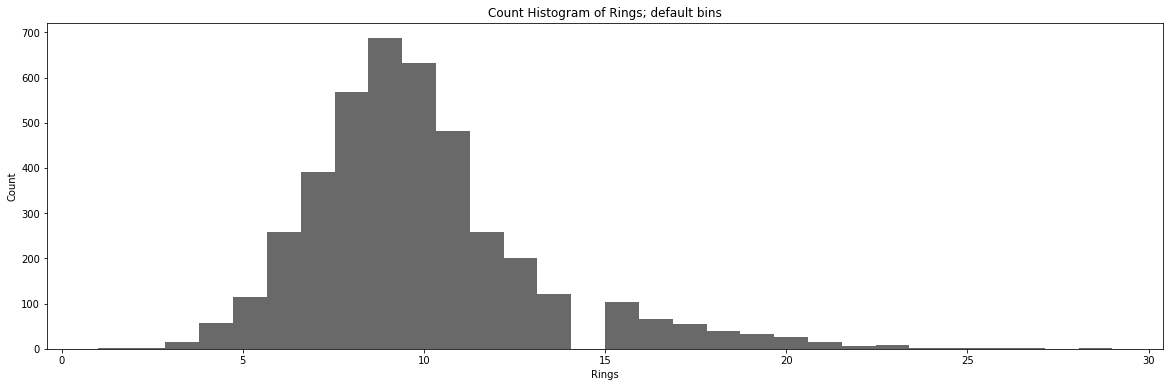

In [39]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df_1[ "Rings"], color="DimGray",bins=30)
axes.set_xlabel( "Rings")
axes.set_ylabel( "Count")
axes.set_title("Count Histogram of Rings; default bins")

plt.show()
plt.close()

We have a gap in our histogram at around 14 rings.

## Pairwise EDA


Since we don't have given research questions, we are going to create our own and form our own guide for pairwise EDA.

1.  What is the correlation between `Sex` and `Rings` 


2.  What is the correlation between `Length` and `Rings` 


3.  What is the correlation between `Diameter` and `Rings` 


4.  What is the correlation between `Height` and `Rings` 


5.  What is the correlation between `Whole weight` and `Rings` 


6.  What is the correlation between `Shucked weight` and `Rings` 


7.  What is the correlation between `Viscera weight` and `Rings` 


8.  What is the correlation between `Shell weight` and `Rings` 


Below are some helper functions for this specific EDA problem.

`correlation` prints out $\rho$ and $r$ for two variables.

In [40]:
def correlation(data, x, y):
    print("Correlation coefficients:")
    print( "r   =", stats.pearsonr(data[x], data[y])[0])
    print( "rho =", stats.spearmanr(data[x], data[y])[0])

`describe_by_category` will show descriptive statistics for a numerical variable by each value of the categorical variable.

In [41]:
def describe_by_category(data, numeric, categorical):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    print(grouped_y)

In [42]:
def lowess_scatter(data, x, y, jitter=0.0, skip_lowess=False):

    if skip_lowess:
        fit = np.polyfit(data[x], data[y], 1)
        line_x = np.linspace(data[x].min(), data[x].max(), 10)
        line = np.poly1d(fit)
        line_y = list(map(line, line_x))
    else:
        lowess = sm.nonparametric.lowess(data[y], data[x], frac=.3)
        line_x = list(zip(*lowess))[0]
        line_y = list(zip(*lowess))[1]

    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)

    xs = data[x]
    if jitter > 0.0:
        xs = data[x] + stats.norm.rvs( 0, 0.5, data[x].size)

    axes.scatter(xs, data[y], marker="o", color="DimGray", alpha=0.5)
    axes.plot(line_x, line_y, color="DarkRed")

    title = "Plot of {0} v. {1}".format(x, y)
    if not skip_lowess:
        title += " with LOWESS"
    axes.set_title(title)
    axes.set_xlabel(x)
    axes.set_ylabel(y)

    plt.show()
    plt.close()

### Sex and Rings

Since `Sex` is a categorical variable, we have to create binary features in order to test the correlation.

`sex_M`,`sex_F` , and `sex_I` will be created where, by default, each of these have a value of 0 and take a value of 1 when the Sex is Male, Female, or Infant respectively.

In [43]:
df_1['sex_M']=0
df_1['sex_F']=0
df_1['sex_I']=0
for index,row in df_1.iterrows():
    if(df_1.iloc[index,0]=="M"):
        df_1.iloc[index,9]=1
    elif(df_1.iloc[index,0]=="F"):
        df_1.iloc[index,10]=1
    else:
        df_1.iloc[index,11]=1
df_1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,sex_M,sex_F,sex_I
0,M,91,73,19,102.8,44.9,20.2,30.0,15,1,0,0
1,M,70,53,18,45.1,19.9,9.7,14.0,7,1,0,0
2,F,106,84,27,135.4,51.3,28.3,42.0,9,0,1,0
3,M,88,73,25,103.2,43.1,22.8,31.0,10,1,0,0
4,I,66,51,16,41.0,17.9,7.9,11.0,7,0,0,1


After doing that we can now run our correlation function on each of `sex_M`,`sex_F`, and `sex_I`.:

In [44]:
correlation(df_1, "sex_M", "Rings")

Correlation coefficients:
r   = 0.18026784762945589
rho = 0.21642730839599134


In [45]:
correlation(df_1, "sex_F", "Rings")

Correlation coefficients:
r   = 0.2526216096261947
rho = 0.2865874006043335


In [46]:
correlation(df_1, "sex_I", "Rings")

Correlation coefficients:
r   = -0.43538650941843193
rho = -0.5061775104499248


`sex_M` and `sex_I` do not have strong correlations with Rings. 

`sex_I` on the otherhand has a relatively stronger correlation.

We can present these correlation by using the describe_by_category function defined above:

In [47]:
describe_by_category(df_1, "Rings", "Sex")

      count       mean       std  min  25%   50%   75%   max
Sex                                                         
F    1293.0  11.099768  3.076191  5.0  9.0  10.0  12.0  29.0
I    1342.0   7.890462  2.511554  1.0  6.0   8.0   9.0  21.0
M    1505.0  10.663787  2.995772  3.0  9.0  10.0  12.0  26.0


F and M have around the same descriptive statistics, whereas I is relatievly different. This goes in line with what we found out with the correlation function.

### Length and Rings

Our initial assumption is that the larger the Length the higher the Rings. This makes sense due to the fact that an older abalone had more time to grow than a younger one.

Running the correlation function on Length and Rings:

In [48]:
correlation(df_1, "Length", "Rings")

Correlation coefficients:
r   = 0.553628189567747
rho = 0.6008849295798827


That's a pretty high correlation.

r=0.55 suggests that the correlation could be linear.

We can conclude that our initial assumption is correct.

### Diameter and Rings

Our initial assumption is that the larger the Diameter the higher the Rings. This makes sense due to the fact that an older abalone had more time to grow than a younger one.

Running the correlation function on Diameter and Rings:

In [49]:
correlation(df_1, "Diameter", "Rings")

Correlation coefficients:
r   = 0.5719793987688263
rho = 0.6196071643258237


That's a pretty high correlation.

r=0.57 suggests that the correlation could be linear.

Furthermore, the rho value is ~ 0.62 which is an indicator that this correlation is even stronger than the Length, and more linear.

We can conclude that our initial assumption is correct.

### Height and Rings

Our initial assumption is that the larger the Height the higher the Rings. This makes sense due to the fact that an older abalone had more time to grow than a younger one.

Running the correlation function on Height and Rings:

In [50]:
correlation(df_1, "Height", "Rings")

Correlation coefficients:
r   = 0.6073137839304048
rho = 0.6557690294576977


That's a pretty high correlation.

r=0.61 suggests that the correlation is linear.

Furthermore, the rho value is ~ 0.66 which is an indicator that this correlation is even stronger than the previous ones tested so far, and more linear.

We can conclude that our initial assumption is correct.

### Whole weight and Rings

Our initial assumption is that the larger the Whole weight the higher the Rings. This makes sense due to the fact that an older abalone had more time to grow than a younger one.

Running the correlation function on Whole weight and Rings:

In [51]:
correlation(df_1, "Whole weight", "Rings")

Correlation coefficients:
r   = 0.5390538394039652
rho = 0.6275998490597332


That's a good correlation.

The rho value is ~ 0.63 which puts this correlation stronger than Diameter and Length but weaker than the Height. 

We can conclude that our initial assumption is correct.

### Shucked weight and Rings

Our initial assumption is that the larger the Shucked weight the higher the Rings. This makes sense due to the fact that an older abalone had more time to grow than a younger one.

Running the correlation function on Shucked weight and Rings:

In [52]:
correlation(df_1, "Shucked weight", "Rings")

Correlation coefficients:
r   = 0.41957020348371465
rho = 0.5351601281690728


There is a correlation but it is not very strong.

The Whole weight resulted in a stronger correlation than the Shucked weight, so we can conclude that our initial assumption that there is a correlation between the Shucked weight and the number of rings, but it is not the main driving feature that resulted in the relatively high correlation of the Whole weight.

### Viscera weight and Rings

Our initial assumption is that the larger the Viscera weight the higher the Rings. This makes sense due to the fact that an older abalone had more time to grow than a younger one.

Running the correlation function on Viscera weight and Rings:

In [53]:
correlation(df_1, "Viscera weight", "Rings")

Correlation coefficients:
r   = 0.5018617789040158
rho = 0.6113044444492483


There is a correlation.

The Whole weight resulted in a stronger correlation than the Viscera weight, so we can conclude that our initial assumption that there is a correlation between the Viscera weight and the number of rings, but it is not the main driving feature that resulted in the relatively high correlation of the Whole weight.

### Shell weight and Rings

Our initial assumption is that the larger the Shell weight the higher the Rings. This makes sense due to the fact that an older abalone had more time to grow than a younger one.

Running the correlation function on Shell weight and Rings:

In [54]:
correlation(df_1, "Shell weight", "Rings")

Correlation coefficients:
r   = 0.6250391466929885
rho = 0.6900136464222016


That is the strongest correlation we've seen so far.

r value of 0.625 suggests that the relationship is highly linear.

rho value of 0.69 suggests that comparing to the other variables this is the highest rank correlation.

We can conclude that there is indeed a correlation between the Shell weight and the number of Rings. In addition, given that this correlation is even higher than the correlation of Whole weight, we can conclude that the Shell weight is the cause of the high Whole weight correlation.

Plotting a lowess scatter plot of Shell weight vs Rings:

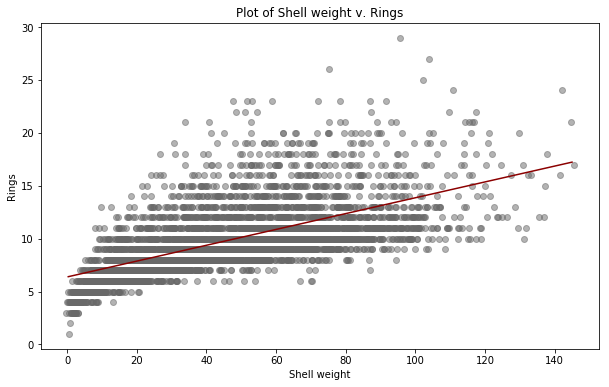

In [55]:
lowess_scatter(df_1, "Shell weight", "Rings", jitter=0.01, skip_lowess=True)

The plot above confirms our assumption and correlative findings.

### Summary


Regarding the answers of the following questions:

1.  What is the correlation between `Sex` and `Rings` 

    No correlation with the adult abalones and rings (male/female). 
    
    But a correlation found between Infants and Rings, r~-0.44


2.  What is the correlation between `Length` and `Rings` 

    Correlation found. r~0.55


3.  What is the correlation between `Diameter` and `Rings` 

    Correlation found. r~0.57


4.  What is the correlation between `Height` and `Rings` 

    Correlation found. r~0.61


5.  What is the correlation between `Whole weight` and `Rings` 

    Correlation found. r~0.54


6.  What is the correlation between `Shucked weight` and `Rings` 

    Correlation found. r~0.42


7.  What is the correlation between `Viscera weight` and `Rings` 

    Correlation found. r~0.50


8.  What is the correlation between `Shell weight` and `Rings` 

    Strongest correlation. r~0.63

## 1.4 Statistical and Mathematical Modeling

Below, we're going to mathemtically model the distribution of `Rings` within the dataset.

We will begin with the poisson distribution:

In [56]:
from scipy.stats import poisson


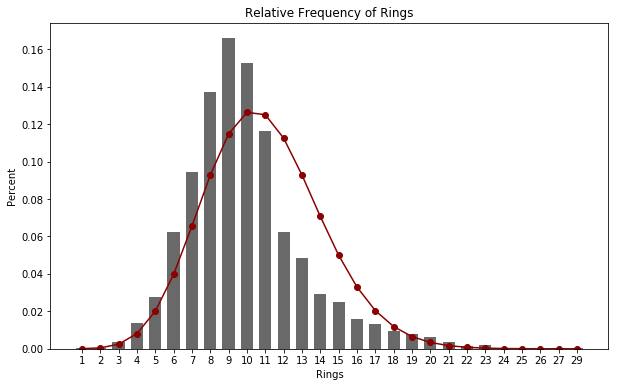

In [57]:
proportions = df_1["Rings"].value_counts(normalize=True).sort_index()
xs = range( len( proportions))
width = 1/1.5
lamb = np.mean(df_1["Rings"]) # m1
ys = [poisson.pmf( x, lamb, 0) for x in xs]
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(xs, proportions, width, color="dimgray", align="center")
axes.set_xlabel("Rings")
axes.set_xticks(xs)
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of Rings")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
axes.plot( xs, ys, color="darkred", marker="o")
plt.show()
plt.close()

The poisson model over-estimates the number of Rings after 11 Rings, but corrects itself at around 18 rings.

Modeling the distribution using a normal distribution model:

In [58]:
from scipy.stats import norm

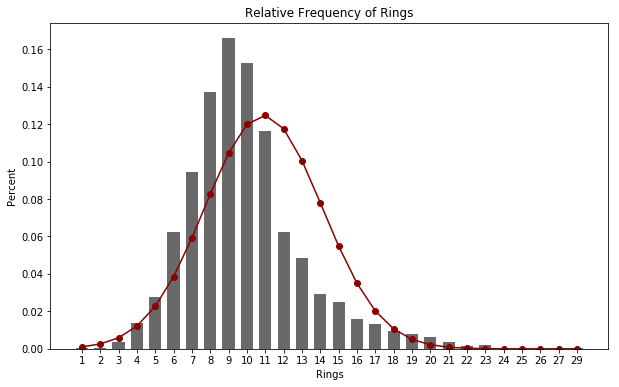

In [59]:
proportions = df_1["Rings"].value_counts(normalize=True).sort_index()
xs = range( len( proportions))
width = 1/1.5
mean = np.mean(df_1["Rings"])
std = np.std(df_1["Rings"])
ys = [norm.pdf( k, loc=mean, scale=std) for k in xs]
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(xs, proportions, width, color="dimgray", align="center")
axes.set_xlabel("Rings")
axes.set_xticks(xs)
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of Rings")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)
axes.plot( xs, ys, color="darkred", marker="o")
plt.show()
plt.close()




Similarily, anything above 11 rings is over estimated but corrects itself at around 18 rings.